In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

In [4]:
import sys
!{sys.executable} -m pip install xlrd

     |████████████████████████████████| 112kB 1.4MB/s eta 0:00:01


Using the data contained in within the `PatientData.xlsx` answer the following questions. 

This data was culled from a set of HIV drug studies in which one of four drugs were given to patients. Many clinical parameters were collected at each of 4 monthly follow-up visits but we will focus on the patient's Viral Load. This is a measure of the amount of HIV RNA is present in the blood which is a good proxy for the health of a patient. Low viral loads indicate that the medication is effectively suppressing viral replication.

Data Description:
  - Age: The patient's age, in years.
  - Drug: The treatment provided to the patient.
  - Month0: The initial viral load (copies/uL) at the beginning of the study.
  - Month1-Month4: The viral loads at monthly followups for 4 months.

In [5]:
pat_df = pd.read_excel('PatientData.xlsx')
pat_df.head()

,Age,Drug,Month0,Month1,Month2,Month3,Month4
0,30,Drug2,5.636962e+06,1.059754e+06,199236.288295,37462.998812,7044.503429
1,54,Drug2,2.260656e+06,6.510708e+05,187551.663442,54050.023993,15571.524033
2,30,Drug3,1.508800e+06,1.434082e+05,13657.120780,1299.166239,142.099372
3,19,Drug2,1.298145e+06,2.440952e+05,45971.968628,8644.024352,1647.873818
4,62,Drug1,7.156592e+06,5.582156e+05,43632.795374,3463.810311,276.337802


# Basic Statistics

Use the `.describe()` method on the ages of the patients in the study.

In [6]:
pat_df.loc[:,'Age'].describe()

count    500.000000
mean      53.610000
std       21.356453
min       18.000000
25%       35.000000
50%       54.000000
75%       73.000000
max       89.000000
Name: Age, dtype: float64

Use the `.describe()` method on the initial viral load of the patients within the study.

In [7]:
pat_df.loc[:,'Month0'].describe()

count    5.000000e+02
mean     3.947745e+06
std      2.557964e+06
min      1.003915e+06
25%      1.768648e+06
50%      3.256761e+06
75%      5.625739e+06
max      9.986100e+06
Name: Month0, dtype: float64

How many patients were randomized into each drug group?

In [8]:
pat_drug_counts = pat_df['Drug'].value_counts()
pat_drug_counts

Drug2    132
Drug1    128
Drug3    124
Drug4    116
Name: Drug, dtype: int64

Plot this distribution as a bar-plot. Make sure to add axis labels. Write a figure caption describing your results.

Text(0.5, 0, 'Drug')

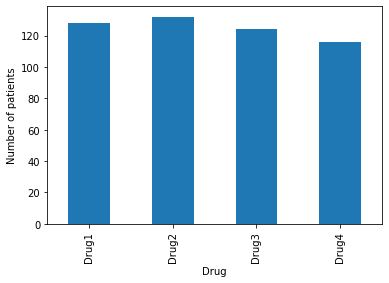

In [10]:
#Create the figure and axis
fig, ax = plt.subplots(1,1)

# Use the pd.Series.plot method to make the bar-plot
order = ['Drug1', 'Drug2', 'Drug3', 'Drug4']
pat_drug_counts.loc[order].plot(kind='bar', ax=ax)

# Add axes labels and a figure caption
ax.set_ylabel('Number of patients')
ax.set_xlabel('Drug')

### Figure 1

__The number of patients taking each drug ranges between 116 and 132.__ The number of patients taking each therapy was plotted as a bar-chart with the height indicating the number patients in each category. Most patients received Drug 2 (132), with 4 patients less receiving Drug 1 (128), followed by Drug 3 (124), and Drug 4 being the least often prescribed drug (116).

# Drug Analysis

Using logical indexing isolate the intitial viral loads of the patients taking each drug and then plot the average viral load as a bar-chart.

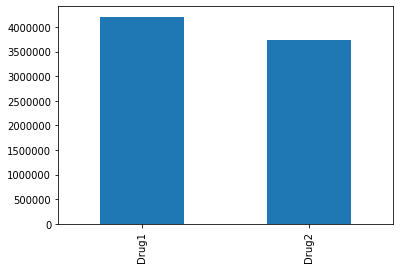

In [11]:
mask1 = pat_df['Drug'] == 'Drug1'
mask2 = pat_df['Drug'] == 'Drug2'

mu1 = pat_df.loc[mask1, 'Month0'].mean()
mu2 = pat_df.loc[mask2, 'Month0'].mean()

init_viral_mean = pd.Series([mu1, mu2], 
                            index=['Drug1', 'Drug2'])

fig, ax = plt.subplots(1,1)

init_viral_mean.plot(kind='bar', ax=ax)


Utilizing the same strategy create a plot that shows the average initial viral-loads and final viral loads of patients taking each drug. Use the left axis `init_ax` for the initial values and the right axis `final_ax` for the final viral loads. 

Adjust the `plt.subplots` command to synchronize the two y-axes.
Then:
  - Adjust the y-limits and the y-scale to be a log-scale
  - Use seaborn to despine the right and top axis lines
  - Give the y-axis a sensical label
  
After this scaling, _are the initial viral loads of patients comparable across treatments?_

Utilizing the subplot command. Create a figure that contains both of these plots. Synchronize overlapping axes. Write a figure caption describing the results of the figure.

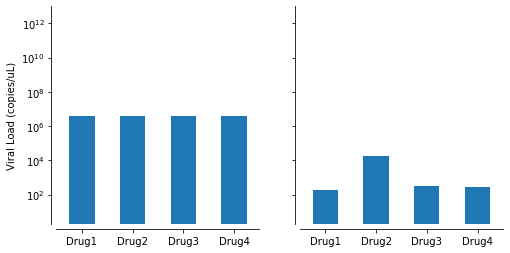

In [60]:
mask1 = pat_df['Drug'] == 'Drug1'
mask2 = pat_df['Drug'] == 'Drug2'
mask3 = pat_df['Drug'] == 'Drug3'
mask4 = pat_df['Drug'] == 'Drug4'

mu1 = pat_df.loc[mask1, 'Month0'].mean()
mu2 = pat_df.loc[mask2, 'Month0'].mean()
mu3 = pat_df.loc[mask3, 'Month0'].mean()
mu4 = pat_df.loc[mask4, 'Month0'].mean()

mf1 = pat_df.loc[mask1, 'Month4'].mean()
mf2 = pat_df.loc[mask2, 'Month4'].mean()
mf3 = pat_df.loc[mask3, 'Month4'].mean()
mf4 = pat_df.loc[mask4, 'Month4'].mean()

init_viral_mean = pd.Series([mu1, mu2, mu3, mu4], 
                            index=['Drug1', 'Drug2', 'Drug3', 'Drug4'])

final_viral_mean = pd.Series([mf1, mf2, mf3, mf4], 
                            index=['Drug1', 'Drug2', 'Drug3', 'Drug4'])

fig, (init_ax, final_ax) = plt.subplots(1,2, figsize=(8,4), sharey = True)

init_ax.set_yscale('log')
final_ax.set_yscale('log')
init_ax.set_ylabel('Viral Load (copies/uL)')
init_ax.set_ylim(2, 10000000000000)

init_viral_mean.plot(kind='bar', ax=init_ax)
final_viral_mean.plot(kind='bar', ax=final_ax)

sbn.despine(offset=5)

### Figure 2

Viral loads of patient cohorts taking Drugs 1 to 4. While initial mean viral loads of the patient pool for each drug are distributed relatively equally (left plot), the viral loads after 4 months show distinct differences (right plot). Patients taking Drug 2 have a higher viral load after 4 months than the other drugs, with drug 1 seemingly achieving the highest reduction of viral loads.

# Trajectory Analysis

Using a for-loop, iterate through all rows of the `pat_df` Dataframe and plot the trajectory of the patient's viral load as an independent line. Use the `alpha` parameter of the plotting function to make each line transparent.

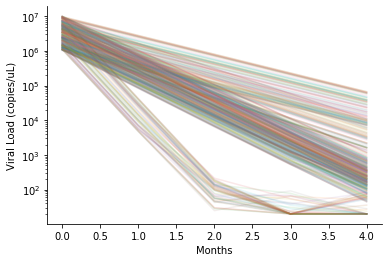

In [61]:
fig, ax = plt.subplots(1,1)

index = ['Month0', 'Month1', 'Month2', 'Month3', 'Month4']

for _, row in pat_df.iterrows():
    
    ax.plot(row[index].values, alpha=0.1)
    
ax.set_yscale('log')
ax.set_ylabel('Viral Load (copies/uL)')
ax.set_xlabel('Months')
sbn.despine(ax=ax)

Redo the figure above such that each drug plotted in a different color. Utilize a `dict` to define a color for each drug and then add that to the plotting arguement. Be sure to add axes labels as well as figure caption.

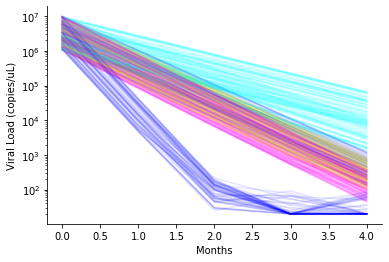

In [109]:
fig, ax = plt.subplots(1,1)
coldict = {'Drug1':'fuchsia', 'Drug2':'aqua','Drug3': 'yellow','Drug4': 'blue'}

index = ['Month0', 'Month1', 'Month2', 'Month3', 'Month4']

for _, row in pat_df.iterrows():
    ax.plot(row[index].values, alpha=0.1, color = coldict[row['Drug']])

    
    
ax.set_yscale('log')
ax.set_ylabel('Viral Load (copies/uL)')
ax.set_xlabel('Months')
sbn.despine(ax=ax)

### Figure 3

Viral load per patient over 4 month period. Colors denote Drug 1 (pink), Drug 2 (aqua), Drug 3 (yellow), and Drug 4 (blue). Over the first few months, Drug 4 reduces viral loads at a higher rate than the other drugs, hence seems more effective. 

# Age Specific Differences

Based on the mechanism of action of these drugs it is possible that they have an age dependent effect. Calculate the percentage change in the first month of the study for three different age ranges:
  - 18-30
  - 30-50
  - 50-70
  
  
Are there noticible difference between ages? Which drug would you suggest for each age-group?

In [160]:
# query for three age groups and Drug 1
red1_1 = pat_df.query('Age <= 30 & Drug == "Drug1"')
red1_2 = pat_df.query('Age >= 30 & Age <= 50 & Drug == "Drug1"')
red1_3 = pat_df.query('Age >= 50 & Drug == "Drug1"')

# calculate percent change on the means by age group and combine into list for Drug1  
Drug1 = [(red1_1['Month0'].mean() - red1_1['Month1'].mean()) / red1_1['Month0'].mean() *100,
    (red1_2['Month0'].mean() - red1_2['Month1'].mean()) / red1_2['Month0'].mean() *100,
    (red1_3['Month0'].mean() - red1_3['Month1'].mean()) / red1_3['Month0'].mean() *100]

# query for three age groups and Drug 2
red1_1 = pat_df.query('Age <= 30 & Drug == "Drug2"')
red1_2 = pat_df.query('Age >= 30 & Age <= 50 & Drug == "Drug2"')
red1_3 = pat_df.query('Age >= 50 & Drug == "Drug2"')

# calculate percent change on the means by age group and combine into list for Drug 3
Drug2 = [(red1_1['Month0'].mean() - red1_1['Month1'].mean()) / red1_1['Month0'].mean() *100,
    (red1_2['Month0'].mean() - red1_2['Month1'].mean()) / red1_2['Month0'].mean() *100,
    (red1_3['Month0'].mean() - red1_3['Month1'].mean()) / red1_3['Month0'].mean() *100]

# query for three age groups and Drug 3
red1_1 = pat_df.query('Age <= 30 & Drug == "Drug3"')
red1_2 = pat_df.query('Age >= 30 & Age <= 50 & Drug == "Drug3"')
red1_3 = pat_df.query('Age >= 50 & Drug == "Drug3"')

# calculate percent change on the means by age group and combine into list for Drug 3
Drug3 = [(red1_1['Month0'].mean() - red1_1['Month1'].mean()) / red1_1['Month0'].mean() *100,
    (red1_2['Month0'].mean() - red1_2['Month1'].mean()) / red1_2['Month0'].mean() *100,
    (red1_3['Month0'].mean() - red1_3['Month1'].mean()) / red1_3['Month0'].mean() *100]

# query for three age groups and Drug 4
red1_1 = pat_df.query('Age <= 30 & Drug == "Drug4"')
red1_2 = pat_df.query('Age >= 30 & Age <= 50 & Drug == "Drug4"')
red1_3 = pat_df.query('Age >= 50 & Drug == "Drug4"')

# calculate percent change on the means by age group and combine into list for Drug 4
Drug4 = [(red1_1['Month0'].mean() - red1_1['Month1'].mean()) / red1_1['Month0'].mean() *100,
    (red1_2['Month0'].mean() - red1_2['Month1'].mean()) / red1_2['Month0'].mean() *100,
    (red1_3['Month0'].mean() - red1_3['Month1'].mean()) / red1_3['Month0'].mean() *100]

df = pd.DataFrame([Drug1, Drug2, Drug3, Drug4], index=['Drug 1', 'Drug 2', 'Drug 3', 'Drug 4'] ,columns=['Age 18 - 30', 'Age 30 - 50', 'Age 50 - 70']) 
df
#dif1_1 = pat_df.loc[red1_1, 'Month0'].mean() - pat_df.loc[red1_1, 'Month1'].mean()

[92.19944417430148, 92.19938165946189, 92.19954662985077]


,Age 18 - 30,Age 30 - 50,Age 50 - 70
Drug 1,92.199444,92.199382,92.199547
Drug 2,81.199405,80.865475,71.199386
Drug 3,90.499554,90.499195,90.499356
Drug 4,99.569492,99.439633,89.569492


### Table 1
This table shows the reduction of viral load over the first month for each drug, by age group. While the effects of drugs 1 and 3 do not seem to be age dependent, drugs 2 and 4 seem to be less efficient for the age group 50 - 70 ys.

Based on this limited analysis, I would recommend Drug 4 for age groups 18 - 30 and 30 - 50, but Drug 1 for patients of age group 50 - 70.